<a href="https://colab.research.google.com/github/kiron-ang/cwjc/blob/main/scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


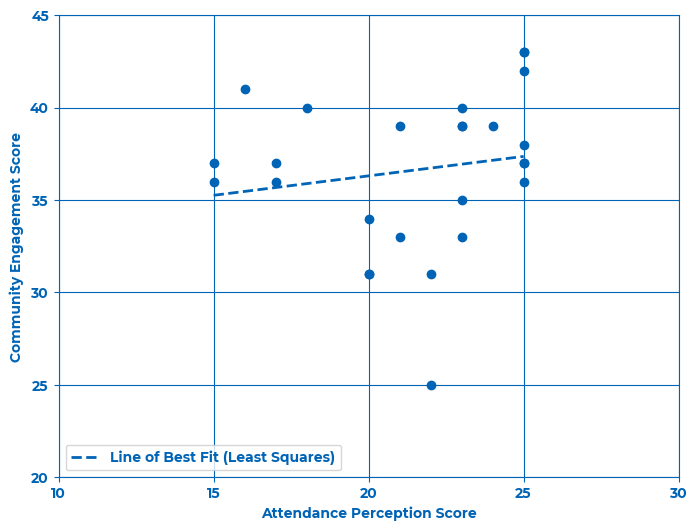

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from google.colab import drive

drive.mount('/content/drive/')
montserrat_path = '/content/drive/My Drive/montserrat.ttf'
fm.fontManager.addfont(montserrat_path)
plt.rcParams['font.family'] = 'montserrat'

df = pd.read_csv('/content/drive/My Drive/survey-data.csv')

# Define the columns for attendance and community scores
attendance_columns = [
    '002-necessary-success',
    '006-pleased-attend',
    '008-attendance-consistent',
    '010-rewarding-worthwhile',
    '012-academic-goals'
]

community_columns = [
    '001-feel-encouraged',
    '003-belong-cwjc',
    '004-discouraged-absent',
    '005-attend-engagement',
    '007-enjoy-engagement',
    '009-new-friends',
    '011-look-forward',
    '013-talk-other',
    '014-consider-community'
]

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate scores
df['attendance_score'] = df[attendance_columns].sum(axis=1)
df['community_score'] = df[community_columns].sum(axis=1)

# Calculate line of best fit
def best_fit_line(x, y):
    m, b = np.polyfit(x, y, 1)
    return m, b

m, b = best_fit_line(df['attendance_score'], df['community_score'])

# Create the scatter plot with customizations
plt.figure(figsize=(8,6))

# Scatter plot with specified color
plt.scatter(df['attendance_score'], df['community_score'], color='#0064b6')

# Create best fit line
x_vals = np.array([df['attendance_score'].min(), df['attendance_score'].max()])
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color='#0064b6', linestyle='--', linewidth=2, label='Line of Best Fit (Least Squares)')

# Get the current axes and customize appearance
ax = plt.gca()
ax.grid(True, color='#0064b6')

# Set tick parameters
plt.tick_params(axis='both', colors='#0064b6')

# Set spines color
for spine in ax.spines.values():
    spine.set_color('#0064b6')

# Set labels and title
plt.xlabel('Attendance Perception Score', color='#0064b6')
plt.ylabel('Community Engagement Score', color='#0064b6')
plt.title('', color='#0064b6')

# Set custom ticks and limits
custom_ticks = np.arange(0, 51, 5)
plt.xticks(custom_ticks)
plt.yticks(custom_ticks)
plt.xlim(10, 30)
plt.ylim(20, 45)

legend = plt.legend(loc='lower left')
for text in legend.get_texts():
    text.set_color('#0064b6')
plt.savefig("1.png", dpi=600)